!pip install pandas		데이터 분석

!pip install xlrd		엑셀 읽기

!pip install xlsxwriter	엑셀 쓰기

!pip install matplotlib	챠트, 그래프

실습을 위해 학생시험성적 엑셀파일을 그림과 같이 생성해준다.

실습 경로는 d:/excel에서 작업한다.

기본파일

1.학생시험성적.xlsx

2.담당자별_판매량_Andy사원.xlsx

3.담당자별_판매량_Becky사원.xlsx

4.담당자별_판매량_Chris사원.xlsx


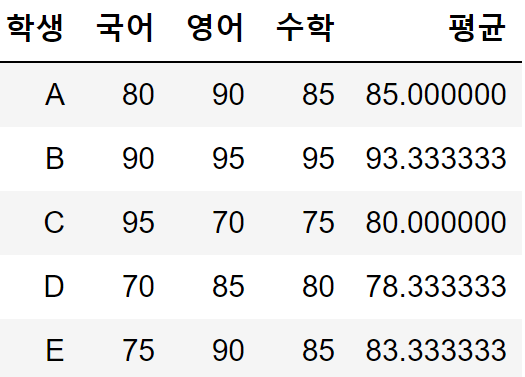

In [1]:
import pandas as pd
df = pd.read_excel('d:/excel/학생시험성적.xlsx')
df

,학생,국어,영어,수학,평균
0,A,80,90,85,85.000000
1,B,90,95,95,93.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333
4,E,75,90,85,83.333333


pandas에서 엑셀파일의 데이터를 읽어오는 방법

df = pd.read_excel(엑셀파일명.확장자, sheet_name = '이름', idex_col = '열이름')
옵션은 이름 대신에 number로 지정해도 된다. (sheet_name = 0)
단, 옵션을 생략할 경우 첫번째를 기본값으로 인식한다.

예) df = pd.read_excel('d:/excel/학생시험성적.xlsx')

In [2]:
import pandas as pd
df = pd.read_excel('d:/excel/학생시험성적.xlsx', sheet_name = 0, index_col = 4)
df

,학생,국어,영어,수학
평균,,,,
85.000000,A,80,90,85
93.333333,B,90,95,95
80.000000,C,95,70,75
78.333333,D,70,85,80
83.333333,E,75,90,85


실습을 위해 학생시험성적 엑셀파일의 첫번째 sheet(중간고사)를 복사하여 기말고사로 수정한다.

# 엑셀에 데이터 작성하기

엑셀에 데이터를 작성하려면 3단계를 거쳐야 한다.

엑셀에 데이터를 작성하려면 1단계

1) pandas의 ExcelWriter 객체를 생성해준다.
   
   excel_writer = pd.ExcelWriter('엑셀파일명.xlsx', engine='xlsxwriter')

엑셀에 데이터를 작성하려면 2단계

2) DataFrame을 이용하여 데이터를 지정된 엑셀 sheet에 작성하기
   
   df1.to_excel(excel_writer, index=True, sheet_name = '시트1 이름')
   
   df2.to_excel(excel_writer, index=False, sheet_name = '시트2 이름')

엑셀에 데이터를 작성하려면 3단계

3) ExcelWriter 객체를 닫고/ 지정된 엑셀 파일을 생성한다.

excel_writer.save()

In [3]:
import pandas as pd

excel_exam_data1 = {'학생': ['일동이', '이동이', '삼동이', '사동이', '오동이'],
                 '컴퓨터': [80, 90, 70, 85, 95],
                    '요리': [85, 75, 90, 100, 60],
                    '외국어': [40, 100, 85, 95, 70]}


In [4]:
df1 = pd.DataFrame(excel_exam_data1, columns=['학생', '컴퓨터','요리','외국어'])
df1

,학생,컴퓨터,요리,외국어
0,일동이,80,85,40
1,이동이,90,75,100
2,삼동이,70,90,85
3,사동이,85,100,95
4,오동이,95,60,70


위에서 작성한 내용을 학생시험성적2.xlsx 파일로 D:/excel/ 폴더에 저장한다.

In [5]:
excel_writer = pd.ExcelWriter('d:/excel/학생시험성적2.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer, index=False)
excel_writer.save()

index=True 옵션을 사용하면 엑셀파일에 인덱스 번호가 자동으로 삽입되며,

index=False 옵션을 사용하면 엑셀파일에 인덱스 번호를 생략하고 데이터만 작성한다.

엑셀 파일 생성시 주의사항

1. 엑셀프로그램으로 엑셀 파일을 연 상태에서 작업하면 오류가 발생한다.

2. pandas로 엑셀파일을 생성하는 코드를 실행하기전 지정된 엑셀파일을 닫아준다.

3. pandas를 이용해 엑셀파일을 생성할 때 같은 이름의 파일이 있을 경우 사용자에게 확인여부없이 데이터를 덮어쓰기 때문에 주의한다.

동일 내용을 시트이름을 지정하여 엑셀파일을 생성한다.
엑셀파일의 경로는 같고, 파일명은 학생시험성적3.xlsx로 한다.(시트이름:방과후수업)

In [6]:
excel_writer2 = pd.ExcelWriter('d:/excel/학생시험성적3.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer2, index=False, sheet_name='방과후수업')
excel_writer2.save()

# 실습

학생시험성적2.xlsx 파일의 sheet1의 이름을 보충수업으로 변경하고
sheet2를 생성하여 이름을 보충수업결과로 저장한다.(shee1의 내용을 복사하여 사용)

# 하나의 엑셀파일에 두 개의 데이터 sheet 생성

In [7]:
import pandas as pd
excel_exam_data2 = {'학생': ['장동건', '송중기', '비', '고소영', '송혜교', '김태희'],
                   '국어': [70, 75, 80, 85, 90, 95],
                   '영어': [95, 90, 85, 80, 75, 70],
                   '수학': [70, 80, 90, 80, 70, 60]}

In [8]:
df2 = pd.DataFrame(excel_exam_data2, columns=['학생', '국어', '영어', '수학'])
df2

,학생,국어,영어,수학
0,장동건,70,95,70
1,송중기,75,90,80
2,비,80,85,90
3,고소영,85,80,80
4,송혜교,90,75,70
5,김태희,95,70,60


In [9]:
excel_writer3 = pd.ExcelWriter('d:/excel/학생시험성적4.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer3, index=False, sheet_name='2학기중간고사')
df2.to_excel(excel_writer3, index=False, sheet_name='2학기기말고사')
excel_writer3.save()

# 엑셀 파일 통합하기

효율적인 데이터를 처리하기 위한 주의사항

1. 열의(컬럼) 머리글 한 줄로 만들고 데이터를 그 아래에 입력한다.

2. 열 머리글이나 데이터 입력부분에 셀 병합 기능은 사용하지 않는다.

3. 데이터를 입력할 때 하나의 셀에 숫자와 단위를 같이 쓰지 않는다.

4. 하나의 셀에 입력한 데이터 형식은 모두 같아야 한다.

5. 하나의 열에 문자열, 숫자, 날짜 등을 혼합하지 않는다.

6. 데이터를 연도, 분기, 월 , 업체별, 제품별 등의 시트로 나누지 않는다.
   가능하면 하나의 시트에 데이터를 작성한다.

In [10]:
import pandas as pd

excel_data_files = ['d:/excel/담당자별_판매량_Andy사원.xlsx',
                   'd:/excel/담당자별_판매량_Becky사원.xlsx',
                   'd:/excel/담당자별_판매량_Chris사원.xlsx',]

In [11]:
# 엑셀 파일 각각에서 읽어온 데이터를 통합하기 위해 변수를 하나 생성해준다.

total_data = pd.DataFrame()

In [12]:
total_data

""


In [13]:
import pandas as pd
for f in excel_data_files :
    df = pd.read_excel(f)
    total_data = total_data.append(df)

In [14]:
total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,1000
3,가방,A,서울,180,150,200,250
0,시계,B,대구,154,108,155,114
1,구두,B,대구,200,223,213,202
2,핸드백,B,대구,350,340,377,392
0,시계,C,다,168,102,149,174
1,구두,C,다,231,279,277,292
2,핸드백,C,다,365,383,308,323


In [15]:
import pandas as pd
for f in excel_data_files :
    df = pd.read_excel(f)
    total_data = total_data.append(df, ignore_index=True)
total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,1000
3,가방,A,서울,180,150,200,250
4,시계,B,대구,154,108,155,114
5,구두,B,대구,200,223,213,202
6,핸드백,B,대구,350,340,377,392
7,시계,C,다,168,102,149,174
8,구두,C,다,231,279,277,292
9,핸드백,C,다,365,383,308,323


파이썬 내장 모듈인 glob를 이용해서 파일명을 일일이 지정하지 않고 자동으로 파일들을 가져올 수 있게 한다.

import glob

glob.glob('파일명')

In [16]:
import glob
glob.glob('d:/excel/담당자*.xlsx')

['d:/excel\\담당자별_판매량_Andy사원.xlsx',
 'd:/excel\\담당자별_판매량_Andy사원2.xlsx',
 'd:/excel\\담당자별_판매량_Becky사원.xlsx',
 'd:/excel\\담당자별_판매량_Becky사원2.xlsx',
 'd:/excel\\담당자별_판매량_Chris사원.xlsx',
 'd:/excel\\담당자별_판매량_Chris사원2.xlsx',
 'd:/excel\\담당자별_판매량_통합.xlsx']

In [17]:
import glob
import pandas as pd

excel_data_file1 = glob.glob("d:/excel/담당자*.xlsx")

total_data1 = pd.DataFrame()

for i in excel_data_file1 :
    df = pd.read_excel(i)
    total_data1 = total_data1.append(df, ignore_index=True)

total_data1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,1000
3,가방,A,서울,180,150,200,250
4,시계,장동건,서울,198,123,120,137
5,구두,장동건,서울,273,241,296,217
6,핸드백,장동건,서울,385,316,355,1000
7,가방,장동건,서울,180,150,200,250
8,시계,B,대구,154,108,155,114
9,구두,B,대구,200,223,213,202


In [18]:
import glob
import pandas as pd
# total_data = pd.DataFrame()
excel_file_name = 'd:/excel/담당자별 판매량 통합.xlsx'
excel_total_file_writer = pd.ExcelWriter(excel_file_name, 
                                         engine='xlsxwriter')
total_data1.to_excel(excel_total_file_writer, 
                     index=False, sheet_name="담당자별 판매량 통합")
excel_total_file_writer.save()
glob.glob(excel_file_name)

['d:/excel/담당자별 판매량 통합.xlsx']

# 데이터를 추가하고 변경하기

import pandas as pd

df = pd.read_excel('엑셀파일명')

df.loc[index_name, column_name] = value(값)


In [19]:
import pandas as pd
df = pd.read_excel
('d:/excel/담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,1000
3,가방,A,서울,180,150,200,250


In [20]:
df[['제품명', '1분기', '2분기', '3분기', '4분기']]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,1000
3,가방,180,150,200,250


In [21]:
df.loc[2,'4분기'] = 1000
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,1000
3,가방,A,서울,180,150,200,250


In [22]:
df.loc[3,'제품명'] = '가방'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,1000
3,가방,A,서울,180,150,200,250


In [23]:
df.loc[3,'제품명'] = '가방'
df.loc[3,'담당자'] = 'A'
df.loc[3,'지역'] = '가'
df.loc[3,'1분기'] = 180
df.loc[3,'2분기'] = 150
df.loc[3,'3분기'] = 200
df.loc[3,'4분기'] = 250
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,1000
3,가방,A,가,180,150,200,250


In [24]:
df['지역'] = '서울'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,1000
3,가방,A,서울,180,150,200,250


In [25]:
excel_file_name = 'd:/excel/담당자별_판매량_Andy사원.xlsx'

new_excel_file = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')

df.to_excel(new_excel_file, index=False)

new_excel_file.save()

glob.glob(excel_file_name)

['d:/excel/담당자별_판매량_Andy사원.xlsx']

# 정규표현식 re

import re

re.sub(pattern, repl, string)  형식으로 사용할 수 있다.

문자열(String)에서 패턴(pattern)을 찾아서 대체 문자열(repl)로 바꾼후 반환한다.

In [26]:
import re
file_name = 'd:/excel/담당자별_판매량_Andy사원.xlsx'
new_file_name = re.sub('.xlsx', '2.xlsx', file_name)
new_file_name

'd:/excel/담당자별_판매량_Andy사원2.xlsx'

In [27]:
import glob
import re
import pandas as pd
                                           # ?는 글자 하나를 의미.
excel_data_files1 = glob.glob("d:/excel/담당자별_판매량_*사원.xlsx")

for i in excel_data_files1 :
    df = pd.read_excel(i)
    if(df.loc[1,'담당자']=='A') :
        df['담당자'] = '장동건'
    elif(df.loc[1,'담당자']=='B') :
        df['담당자'] = '송중기'
    elif(df.loc[1,'담당자']=='C') :
        df['담당자'] = '비'
    i_new = re.sub('.xlsx', '2.xlsx', i)
    print(i_new)
    
    new_excel_file = pd.ExcelWriter(i_new, engine='xlsxwriter')
    df.to_excel(new_excel_file, index=False)
    new_excel_file.save()

d:/excel\담당자별_판매량_Andy사원2.xlsx
d:/excel\담당자별_판매량_Becky사원2.xlsx
d:/excel\담당자별_판매량_Chris사원2.xlsx


이번 실습은 담당자별_판매량_통합.xlsx 파일을 선택합니다.

In [28]:
import pandas as pd

df = pd.read_excel('d:/excel/담당자별_판매량_통합.xlsx')

df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
2,핸드백,A,서울,385,316,355,331
3,시계,B,대구,154,108,155,114
4,구두,B,대구,200,223,213,202
5,핸드백,B,대구,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323
9,시계,A,서울,198,123,120,137


In [29]:
df['제품명']

0      시계
1      구두
2     핸드백
3      시계
4      구두
5     핸드백
6      시계
7      구두
8     핸드백
9      시계
10     구두
11    핸드백
12     시계
13     구두
14    핸드백
15     시계
16     구두
17    핸드백
18     시계
19     구두
20    핸드백
21     시계
22     구두
23    핸드백
24     시계
25     구두
26    핸드백
27     시계
28     구두
29    핸드백
30     시계
31     구두
32    핸드백
33     시계
34     구두
35    핸드백
36     시계
37     구두
38    핸드백
Name: 제품명, dtype: object

In [30]:
df['제품명'] == '핸드백'

0     False
1     False
2      True
3     False
4     False
5      True
6     False
7     False
8      True
9     False
10    False
11     True
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20     True
21    False
22    False
23     True
24    False
25    False
26     True
27    False
28    False
29     True
30    False
31    False
32     True
33    False
34    False
35     True
36    False
37    False
38     True
Name: 제품명, dtype: bool

In [31]:
handbag = df[df['제품명'] == '핸드백']
handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,서울,385,316,355,331
5,핸드백,B,대구,350,340,377,392
8,핸드백,C,다,365,383,308,323
11,핸드백,A,서울,385,316,355,331
14,핸드백,B,대구,350,340,377,392
17,핸드백,C,다,365,383,308,323
20,핸드백,A,서울,385,316,355,331
23,핸드백,B,대구,350,340,377,392
26,핸드백,C,다,365,383,308,323
29,핸드백,C,다,365,383,308,323


In [32]:
import pandas as pd

df = pd.read_excel('d:/excel/담당자별_판매량_통합.xlsx')

handbag1 = df[df['제품명'].isin(['핸드백'])]

handbag1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,서울,385,316,355,331
5,핸드백,B,대구,350,340,377,392
8,핸드백,C,다,365,383,308,323
11,핸드백,A,서울,385,316,355,331
14,핸드백,B,대구,350,340,377,392
17,핸드백,C,다,365,383,308,323
20,핸드백,A,서울,385,316,355,331
23,핸드백,B,대구,350,340,377,392
26,핸드백,C,다,365,383,308,323
29,핸드백,C,다,365,383,308,323


&   AND연산     |  OR연산   !  NOT연산

In [33]:
df[(df['제품명'] == '구두') | (df['제품명'] == '시계')]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,서울,198,123,120,137
1,구두,A,서울,273,241,296,217
3,시계,B,대구,154,108,155,114
4,구두,B,대구,200,223,213,202
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
9,시계,A,서울,198,123,120,137
10,구두,A,서울,273,241,296,217
12,시계,B,대구,154,108,155,114
13,구두,B,대구,200,223,213,202


In [34]:
df[(df['담당자'] == 'B') & (df['제품명'] != '구두')]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
3,시계,B,대구,154,108,155,114
5,핸드백,B,대구,350,340,377,392
12,시계,B,대구,154,108,155,114
14,핸드백,B,대구,350,340,377,392
21,시계,B,대구,154,108,155,114
23,핸드백,B,대구,350,340,377,392
33,시계,B,대구,154,108,155,114
35,핸드백,B,대구,350,340,377,392


In [35]:
df[(df['담당자'] == 'B') & (df['제품명'] == '구두')]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
4,구두,B,대구,200,223,213,202
13,구두,B,대구,200,223,213,202
22,구두,B,대구,200,223,213,202
34,구두,B,대구,200,223,213,202


In [36]:
df[(df['3분기'] >= 300)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,서울,385,316,355,331
5,핸드백,B,대구,350,340,377,392
8,핸드백,C,다,365,383,308,323
11,핸드백,A,서울,385,316,355,331
14,핸드백,B,대구,350,340,377,392
17,핸드백,C,다,365,383,308,323
20,핸드백,A,서울,385,316,355,331
23,핸드백,B,대구,350,340,377,392
26,핸드백,C,다,365,383,308,323
29,핸드백,C,다,365,383,308,323


In [37]:
df[(df['제품명'] == '핸드백') & (df['3분기'] >= 300)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,서울,385,316,355,331
5,핸드백,B,대구,350,340,377,392
8,핸드백,C,다,365,383,308,323
11,핸드백,A,서울,385,316,355,331
14,핸드백,B,대구,350,340,377,392
17,핸드백,C,다,365,383,308,323
20,핸드백,A,서울,385,316,355,331
23,핸드백,B,대구,350,340,377,392
26,핸드백,C,다,365,383,308,323
29,핸드백,C,다,365,383,308,323


# 그래프를 만들어 엑셀에 삽입하기

1) pandas의 ExcelWriter 객체 생성

2) DataFrame 데이터를 지정된 엑셀 시트에 넣기

3) ExcelWriter 객체에서 워크시트 생성하기

4) 워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기

5) ExcelWriter 객체를 닫고 엑셀 파일 출력하기

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

sales = {'시간': [9, 10, 11, 12, 13, 14, 15],
        '제품1': [15, 14, 13, 12 ,11, 10, 9],
        '제품2': [12, 13, 14, 10, 9, 11, 15]}

df = pd.DataFrame(sales, index=sales['시간'], 
                  columns = ['제품1', '제품2'])

df.index.name = '시간'

df

,제품1,제품2
시간,,
9,15,12
10,14,13
11,13,14
12,12,10
13,11,9
14,10,11
15,9,15


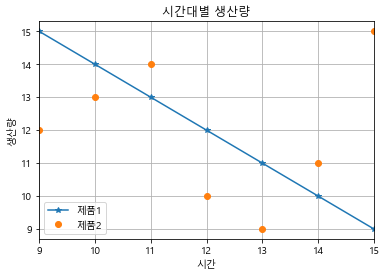

In [39]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams['font.family']='Malgun Gothic' # '맑은고딕'으로 설정
matplotlib.rcParams['axes.unicode_minus'] = False

product_plot = df.plot(grid = True, style = ['-*', 'o'], title='시간대별 생산량')
product_plot.set_ylabel("생산량")

image_file = 'd:/excel/fig_for excel1.png' 	# 이미지 파일 경로 및 이름
plt.savefig(image_file, dpi = 400) 		# 그래프를 이미지 파일로 저장

plt.show() 


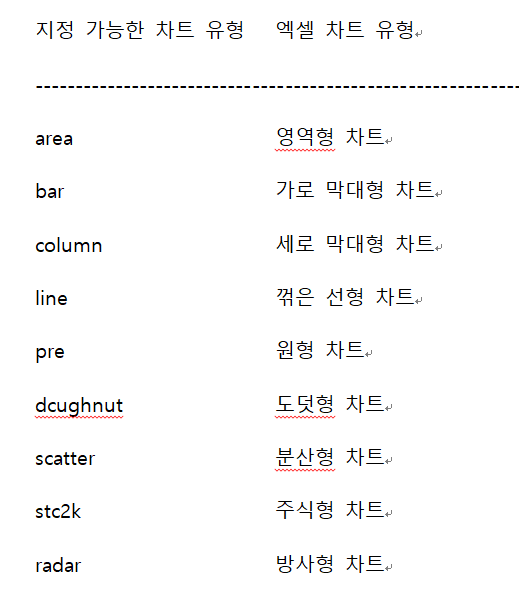

In [40]:
# pandas ExcelWriter 객체 생성

excel_chart = pd.ExcelWriter('d:/excel/data_chart.xlsx', engine='xlsxwriter')

In [41]:
# DataFrame 객체로 데이터를 지정된 엑셀 시트에 넣기

df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

In [42]:
# ExcelWriter 객체에서 워크북과 워크시트 생성하기

workbook = excel_chart.book

worksheet = excel_chart.sheets['Sheet1']

In [43]:
# 원하는 챠크 종류 지정하기

chart = workbook.add_chart({'type': 'line'})

In [44]:
# 챠트 생성을 위한 데이터값의 범위 지정하기

chart.add_series({'values':'=Shee1$B$2:$B$8'})
chart.add_series({'values':'=Shee1$C$2:$C$8'})

In [45]:
# 워크시트에 차트가 들어갈 위치 지정하기

worksheet.insert_chart('H2', chart)

In [46]:
# ExcelWriter 객체롤 닫고 엑셀 파일 출력하기

excel_chart.save()